# Assignment Module 1: Hotel Booking Data Preprocessing

## Data Dictionary
For this project on data preprocessing I will be using a [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv) dataset on hotel stays. Fields description below:

- __Hotel__: (H1 = Resort Hotel or H2 = City Hotel).
- __is_canceled__: Value indicating if the booking was canceled (1) or not (0).
- __lead_time__: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- __arrival_date_year__: Year of arrival date.
- __arrival_date_month__: Month of arrival date.
- __arrival_date_week_number__: Week number of year for arrival date.
- __arrival_date_day_of_month__: Day of arrival date.
- __stays_in_weekend_nights__: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- __stays_in_week_nights__: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- __adults__: Number of adults.
- __children__: Number of children.
- __babies__: Number of babies.
- __meal__: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).
- __country__: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
- __market_segment__: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- __distribution_channel__: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- __is_repeated_guest__: Value indicating if the booking name was from a repeated guest (1) or not (0).
- __previous_cancellations__: Number of previous bookings that were cancelled by the customer prior to the current booking.
- __previous_bookings_not_canceled__: Number of previous bookings not cancelled by the customer prior to the current booking.
- __reserved_room_type__: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- __assigned_room_type__: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- __booking_changes__: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
- __deposit_type__: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- __agent__: ID of the travel agency that made the booking.
- __company__: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
- __days_in_waiting_list__: Number of days the booking was in the waiting list before it was confirmed to the customer.
- __customer_type__: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
- __adr__: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
- __required_car_parking_spaces__: Number of car parking spaces required by the customer.
- __total_of_special_requests__: Number of special requests made by the customer (e.g. twin bed or high floor).
- __reservation_status__: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.
- __reservation_status_date__: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

## Preprocessing

In [1]:
# getting neccesary libraries
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold

In [2]:
# reading from github and loading in dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gitjuli/AutoML/master/Data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


I can see the 32 fields in this dataset.

In [3]:
# get dataframe structure info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The majority of the data types corresponds to numbers, and the rest is string. Next I will take a closer look at the null values.

In [4]:
null_count = df.isnull().sum()

# get percent of missing data
missing = df.isnull().mean() * 100

#creating a dictionary with the count of null and negative values
d = {'# Missing':null_count,'% of Total':missing}
pd.DataFrame(d)

,# Missing,% of Total
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


There are only 4 columns with missing values, with __company__ being the highest with 94% of the data. Considering this high percentage of missing data I will exclude this column from the analysis. <br>

According to the data dictionary, __agent__ is an ID, so it does not add any meaningful information for a machine learning model, we can exclude it too.

In [5]:
# drop company and agent
df = df.drop(['company'], axis=1)
df = df.drop(['agent'], axis=1)

# sanity check
df.shape

(119390, 30)

Next I will split the __reservation_status_date__ into 3 columns, extracting the year, month and day. 

In [6]:
# split reservation_status_date
df['reservation_status_year'] = pd.DatetimeIndex(df['reservation_status_date']).year
df['reservation_status_month'] = pd.DatetimeIndex(df['reservation_status_date']).month
df['reservation_status_day'] = pd.DatetimeIndex(df['reservation_status_date']).day

# drop reservation_status_date column
df = df.drop(['reservation_status_date'], axis=1)

# sanity check
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015,7,1


Next I will group numeric and categorical fields. Considering the nature of certain categorical columns, with a high number of distinct values, I will plot them separately to the rest.

In [7]:
numeric = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
          'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
          'adr','required_car_parking_spaces','total_of_special_requests']

categorical_group1 = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
                'meal', 'market_segment', 'distribution_channel',
                'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
                'customer_type','reservation_status','reservation_status_year','reservation_status_month']

categorical_group2 = ['arrival_date_week_number','arrival_date_day_of_month','country',
                      'reservation_status_day']

In [8]:
# sanity check to verify that all columns are in the groups
len(numeric) + len(categorical_group1) + len(categorical_group2)

32

## Analyzing categorical features

Here I will plot the features to get some insights on the nature of the data and then apply the necessary transformations.

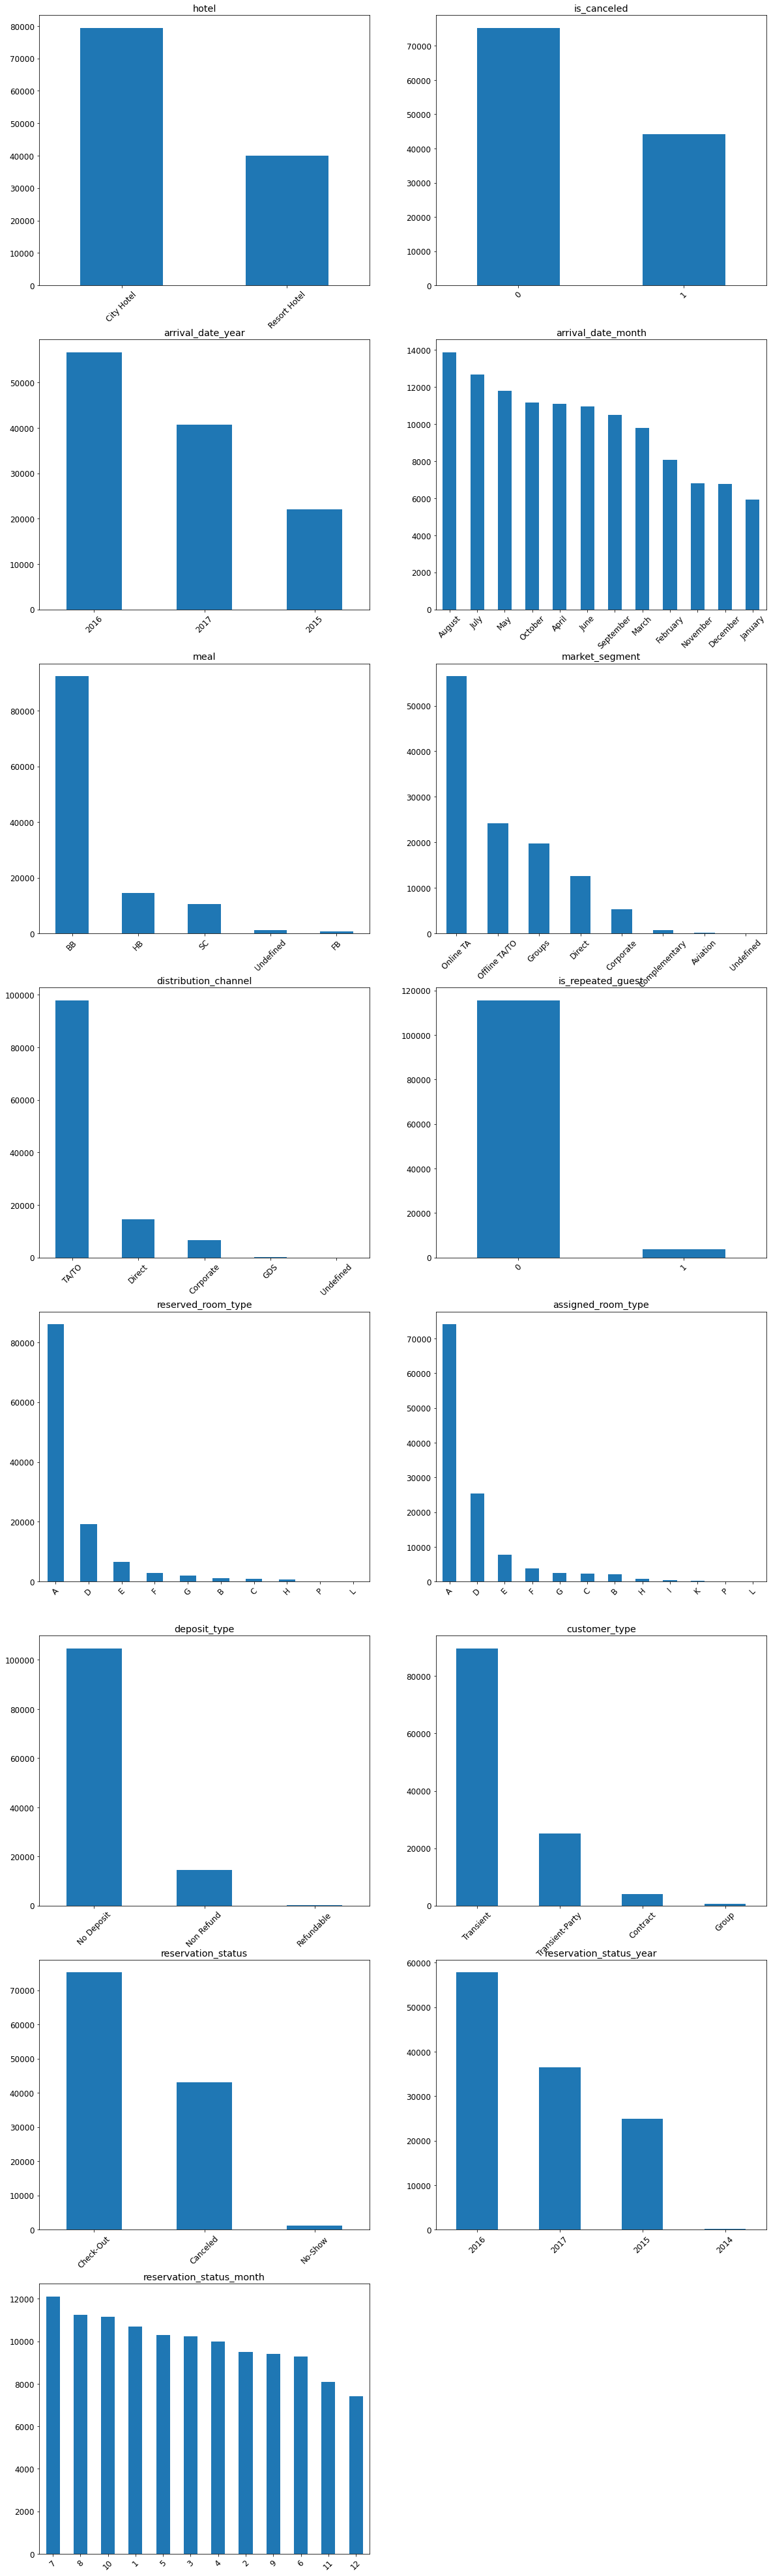

In [9]:
#define a figure to which we will add boxplots of each attribute.
plt.rcParams.update({'font.size': 12,'figure.figsize':(20,90)})

#use an index to identify the spot of the subplot
j=1
columns=df[categorical_group1].columns.tolist()
for k in columns:   #for each numeric column in the dataframe
    plt.subplot(10,2,j) 
    df[k].value_counts().plot(kind='bar');
    plt.title(k)
    plt.xticks(rotation=45)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show();

From the graphs I can see:

- __hotel:__ need to convert text to 0 and 1, since is binary.
- __is_canceled:__ no issues.
- __arrival_date_year:__ need to scale the data.
- __arrival_date_month:__ need to convert text to numbers and scale the data.
- __meal:__ can group together 'Undefined' and 'FB' into a new category called 'meal_other'. Will need dummy columns for the rest.
- __market_segment:__ can group together 'Corporate', 'Complementary', 'Aviation' and 'Undefined' into a new category called 'market_segment_other'. Will need dummy columns for the rest.
- __distribution_channel:__ can group together 'Corporate', 'GDS' and 'Undefined' into a new category called 'distribution_channel_other'. Will need dummy columns for the rest.
- __is_repeated_guest:__ there is low variability on the data, will look closer.
- __reserved_room_type:__ can group together 'F' within the other values with fewer instances than 'F' into a new category called 'reserved_room_type_other'. Will need dummy columns for the rest.
- __assigned_room_type:__ same as above.
- __deposit_type:__ can exclude the records with 'Refundable'. Create dummy columns.
- __customer_type:__ can group together 'Contract' and 'Group' in into a new category called 'customer_type_other'. Will need dummy columns for the rest.
- __reservation_status:__ create dummy columns.
- __reservation_status_year:__ can exclude 2015. Need to scale the data.
- __reservation_status_month:__ need to scale the data.

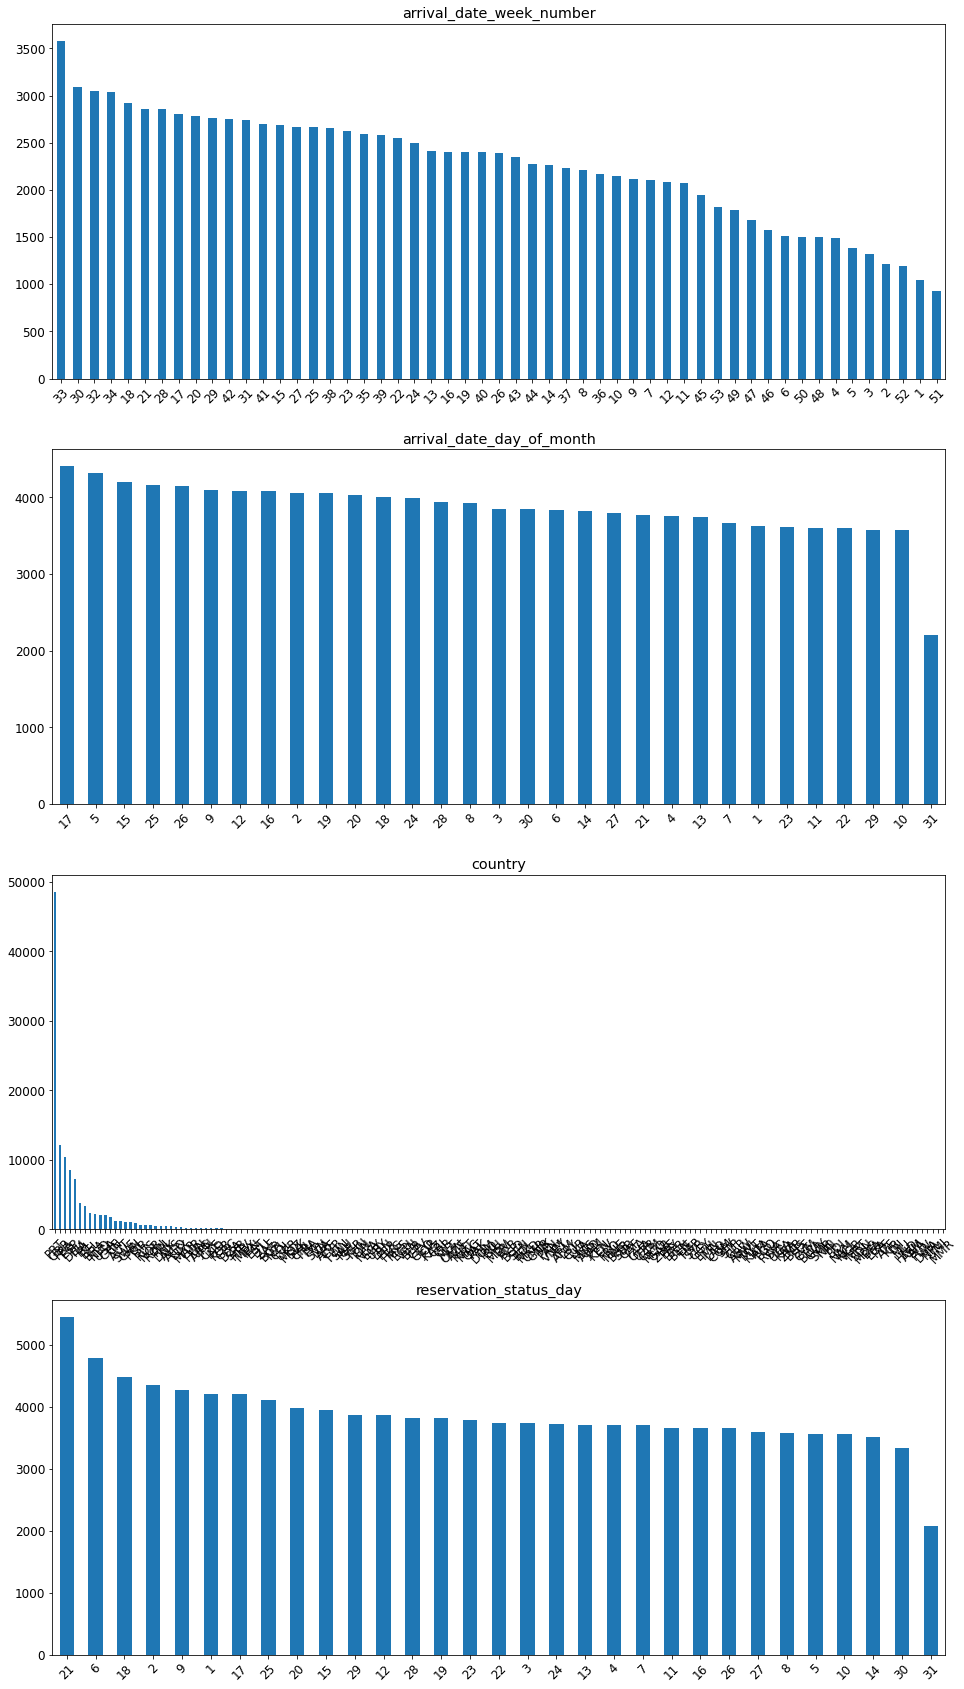

In [10]:
#define a figure to which we will add boxplots of each attribute.
plt.rcParams.update({'font.size': 12,'figure.figsize':(16,30)})

#use an index to identify the spot of the subplot
j=1
columns=df[categorical_group2].columns.tolist()
for k in columns:   #for each numeric column in the dataframe
    plt.subplot(4,1,j) 
    df[k].value_counts().plot(kind='bar');
    plt.title(k)
    plt.xticks(rotation=45)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show();

From the above graphs I can see:

- __arrival_date_week_number:__ need to scale the data.
- __arrival_date_day_of_month:__ need to scale the data.
- __country:__ need to group sparse classes and create dummy columns. There is also missing values that can be addressed.
- __reservation_status_day:__ need to scale the data.

Next I will analyze each of these attributes individually to apply the corresponding updates to make the field suitable for ML purposes.

### hotel

Since this is string data, I need to convert it to integer, to allow a ML algorithm to use it properly, creating a new column with a value 1 when the record is a Resort Hotel and 0 otherwise. Then delete the original hotel column.

In [11]:
# assign 1 when is Resort Hotel
df['resort_hotel'] = df['hotel'].apply(lambda x: 1 if x == 'Resort Hotel' else 0)
df['resort_hotel'].value_counts()

# replace new column in the list
categorical_group1 = ['resort_hotel' if x == 'hotel' else x for x in categorical_group1]

# drop hotel column
df = df.drop(['hotel'], axis=1)

# sanity check
df.shape

(119390, 32)

### is_canceled
Everything looks good, no action is required.

### arrival_date_year

Need to scale the years. For this we will have a list called __to_scale__ which I will use later.

In [12]:
to_scale = ['arrival_date_year']

### arrival_date_month

Need to replace the existing month names to numbers and append to the features that need to be scaled.

In [13]:
df.arrival_date_month.replace(['January','February','March','April','May','June','July',
                               'August','September','October','November','December'],
                            [1,2,3,4,5,6,7,8,9,10,11,12], inplace = True)

# append to scale columns list
to_scale.append('arrival_date_month')

### meal

The strategy to group sparse classes, for __meal__ or any other column that requires it, I will create a dictionary with the 'key' being the meal description and 'value' with the number of instances of that particular meal. Then I will use a lambda function to check whether the counts is lower than 5% of the data and assign a new value called __other__.

In addition a list (__to_dummies__) will store the columns that will then be converted to dummies.

In [14]:
#create list to store columns that will convert to dummies
to_dummies = ['meal']

# define threshold to 5% of the data for sparse classes
threshold = df.shape[0] * 0.05

# group sparse classes
dict_counts = df['meal'].value_counts().to_dict()
df['meal'] = df['meal'].apply(lambda x: 'other' if dict_counts[x] <= threshold else x)

#sanity check
df['meal'].value_counts()

BB       92310
HB       14463
SC       10650
other     1967
Name: meal, dtype: int64

### market_segment

Same logic as above for dummies and sparse classes.

In [15]:
#append to dummy columns list
to_dummies.append('market_segment')

# Group sparse classes
dict_counts = df['market_segment'].value_counts().to_dict()
df['market_segment'] = df['market_segment'].apply(lambda x: 'other' if dict_counts[x] <= threshold else x)

#sanity check
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
other             6277
Name: market_segment, dtype: int64

### distribution_channel

Same logic as above for dummies and sparse classes.

In [16]:
# append to dummy columns list
to_dummies.append('distribution_channel')

# Group sparse classes
dict_counts = df['distribution_channel'].value_counts().to_dict()
df['distribution_channel'] = df['distribution_channel'].apply(lambda x: 'other' if dict_counts[x] <= threshold else x)

#sanity check
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
other          198
Name: distribution_channel, dtype: int64

### reserved_room_type

Same logic as above for dummies and sparse classes.

In [17]:
# append to dummy columns list
to_dummies.append('reserved_room_type')

# Group sparse classes
dict_counts = df['reserved_room_type'].value_counts().to_dict()
df['reserved_room_type'] = df['reserved_room_type'].apply(lambda x: 'other' if dict_counts[x] <= threshold else x)

#sanity check
df['reserved_room_type'].value_counts()

A        85994
D        19201
other     7660
E         6535
Name: reserved_room_type, dtype: int64

### assigned_room_type

Same logic as above for dummies and sparse classes.

In [18]:
# append to dummy columns list
to_dummies.append('assigned_room_type')

# Group sparse classes
dict_counts = df['assigned_room_type'].value_counts().to_dict()
df['assigned_room_type'] = df['assigned_room_type'].apply(lambda x: 'other' if dict_counts[x] <= threshold else x)

#sanity check
df['assigned_room_type'].value_counts()

A        74053
D        25322
other    12209
E         7806
Name: assigned_room_type, dtype: int64

### deposit_type

Only need to create dummies.

In [19]:
# append to dummy columns list
to_dummies.append('deposit_type')

### customer_type

Same logic as above for dummies and sparse classes.

In [20]:
# append to dummy columns list
to_dummies.append('customer_type')

# Group sparse classes
dict_counts = df['customer_type'].value_counts().to_dict()
df['customer_type'] = df['customer_type'].apply(lambda x: 'other' if dict_counts[x] <= threshold else x)

#sanity check
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
other               4653
Name: customer_type, dtype: int64

### reservation_status, reservation_status_year, reservation_status_month, reservation_status_day, arrival_date_week_number, arrival_date_day_of_month

Need to create dummies for reservation_status and scale the rest.

In [21]:
# append to dummy columns list
to_dummies.append('reservation_status')

# append to scale columns list
to_scale.append('reservation_status_year')
to_scale.append('reservation_status_month')
to_scale.append('reservation_status_day')
to_scale.append('arrival_date_week_number')
to_scale.append('arrival_date_day_of_month')

### country

To avoid deleting ~ 500 rows of data I will replace the null values with the string 'missing' and then this will became a new column with the dummies. Then considering the large number of different countries I will use 3% as a threshold to cut the sparse data.

In [22]:
#filling null values with 'missing'
df['country'].fillna('missing', inplace=True)

# define threshold to 3% of the data
threshold = df.shape[0] * 0.03

# append to dummy columns list
to_dummies.append('country')

# Group sparse classes
dict_counts = df['country'].value_counts().to_dict()
df['country'] = df['country'].apply(lambda x: 'other' if ((dict_counts[x] <= threshold) and x != 'missing') else x)

#sanity check
df['country'].value_counts()

PRT        48590
other      28147
GBR        12129
FRA        10415
ESP         8568
DEU         7287
ITA         3766
missing      488
Name: country, dtype: int64

### Scale the data
Since most of the features does not seem to follow a normal distribution I will use min-max normalization through MinMaxScaler.

In [23]:
# create a copy of the dataframe
df_scaled = df.copy()

# apply normalization to selected features
features = df_scaled[to_scale]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
df_scaled[to_scale] = features

# sanity check
df_scaled.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day,resort_hotel
0,0,342,0.0,0.545455,0.5,0.0,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,0.333333,0.545455,0.0,1
1,0,737,0.0,0.545455,0.5,0.0,0,0,2,0.0,...,0,Transient,0.0,0,0,Check-Out,0.333333,0.545455,0.0,1


Here I will plot the fields again to see the changes after scaling the data.

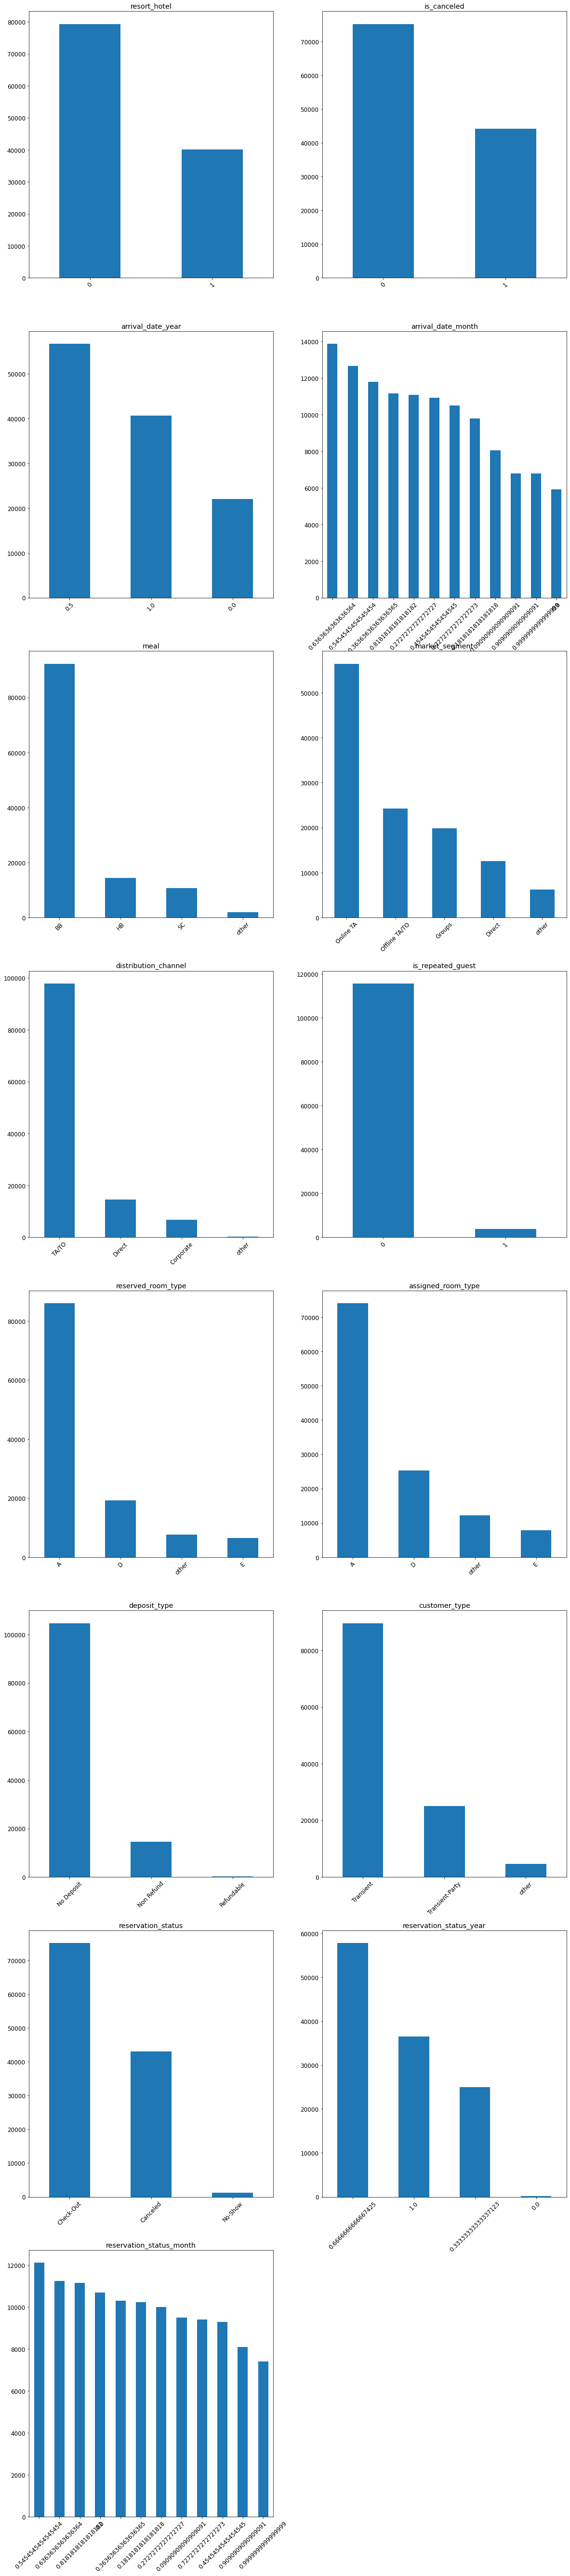

In [24]:
#define a figure to which we will add boxplots of each attribute.
plt.rcParams.update({'font.size': 12,'figure.figsize':(20,120)})

#use an index to identify the spot of the subplot
j=1
columns=df_scaled[categorical_group1].columns.tolist()
for k in columns:   #for each numeric column in the dataframe
    plt.subplot(10,2,j) 
    df_scaled[k].value_counts().plot(kind='bar');
    plt.title(k)
    plt.xticks(rotation=45)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show();

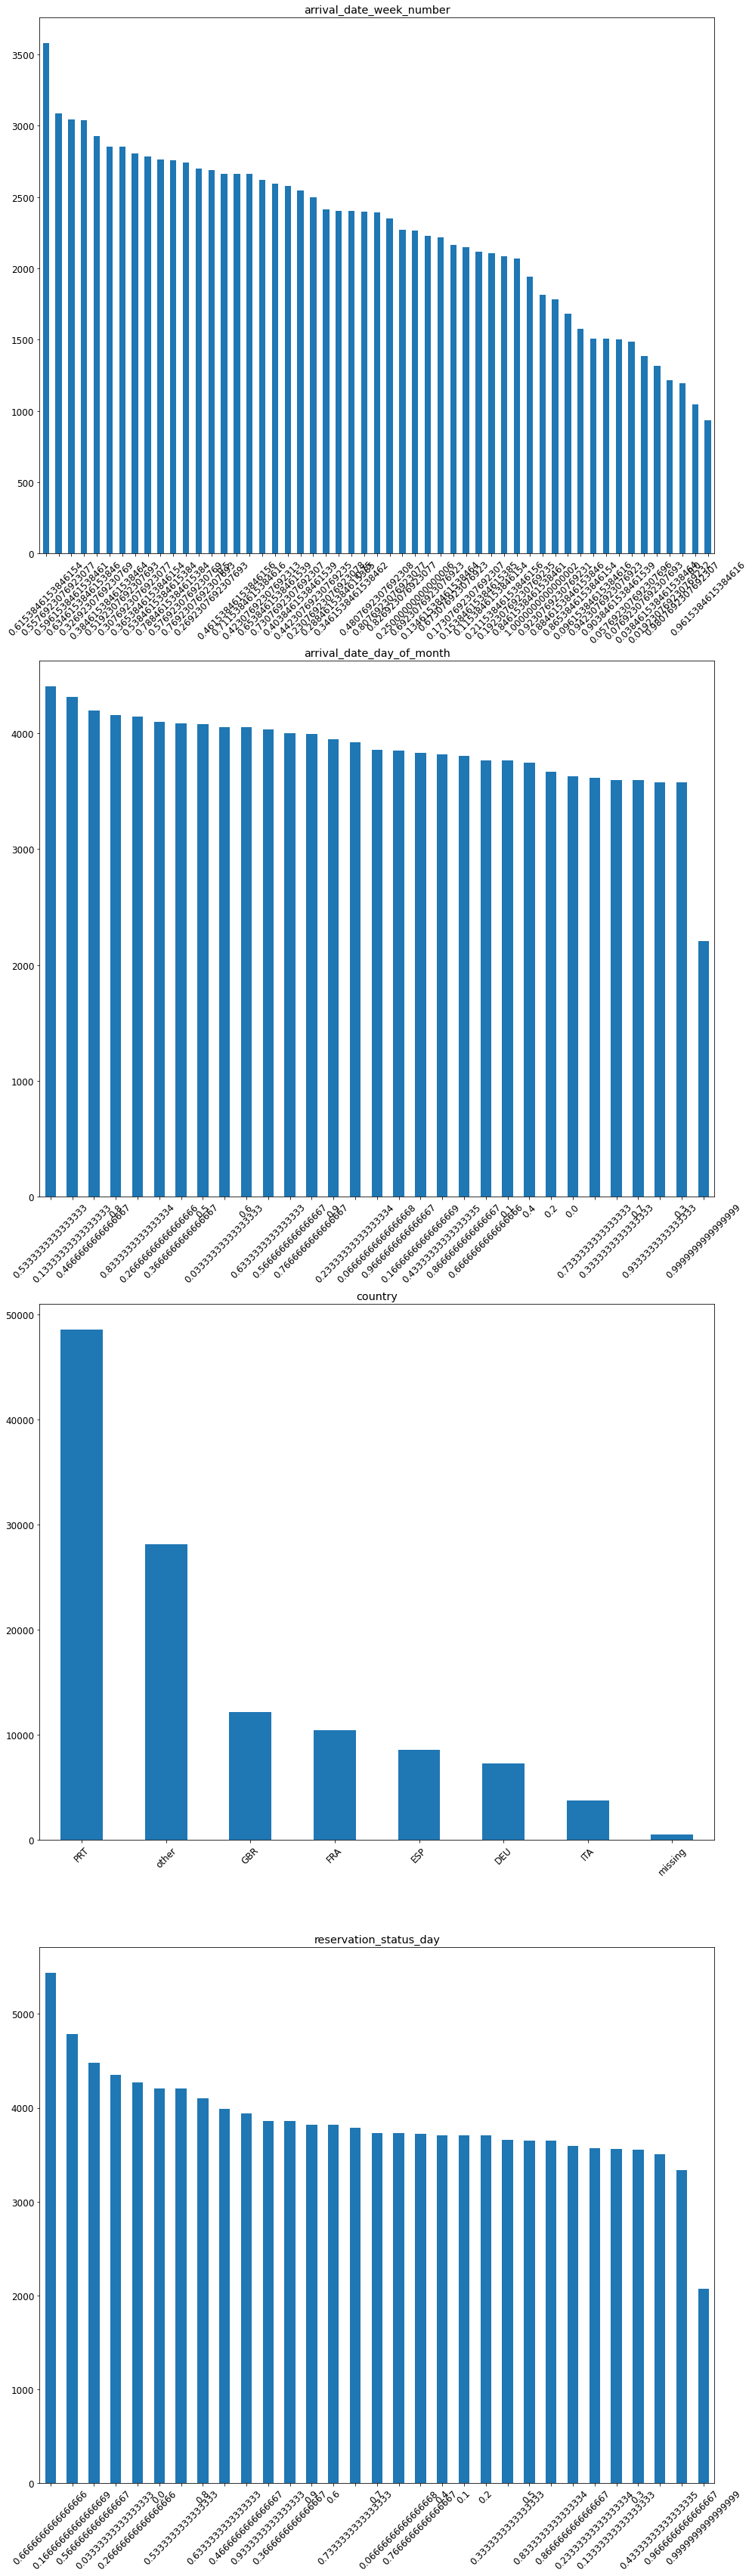

In [25]:
#define a figure to which we will add boxplots of each attribute.
plt.rcParams.update({'font.size': 12,'figure.figsize':(16,60)})

#use an index to identify the spot of the subplot
j=1
columns=df_scaled[categorical_group2].columns.tolist()
for k in columns:   #for each numeric column in the dataframe
    plt.subplot(4,1,j) 
    df_scaled[k].value_counts().plot(kind='bar');
    plt.title(k)
    plt.xticks(rotation=45)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show();

Now the categorical numeric features are weighted equally in their representation with a value between 0 and 1. Also columns with a big number of different values have been grouped together to reduce sparse data. <br> In addition, missing values were imputed for country.

### Dummy columns

Will create n-1 dummy columns per each attribute excluding the first value.

In [26]:
# Getting the dummy variables.
df_dummies = pd.get_dummies(df_scaled, columns = to_dummies, drop_first=True)

# sanity check
df_dummies.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type_other,reservation_status_Check-Out,reservation_status_No-Show,country_ESP,country_FRA,country_GBR,country_ITA,country_PRT,country_missing,country_other
0,0,342,0.0,0.545455,0.5,0.0,0,0,2,0.0,...,0,1,0,0,0,0,0,1,0,0
1,0,737,0.0,0.545455,0.5,0.0,0,0,2,0.0,...,0,1,0,0,0,0,0,1,0,0


Now we have 52 columns of data. Next I will perform a similar analysis with the numeric features.

In [27]:
# create a copy of the dataframe
df = df_dummies.copy()

## Analyzing numeric features

First step is to create a correlation matrix to get some initial insights.

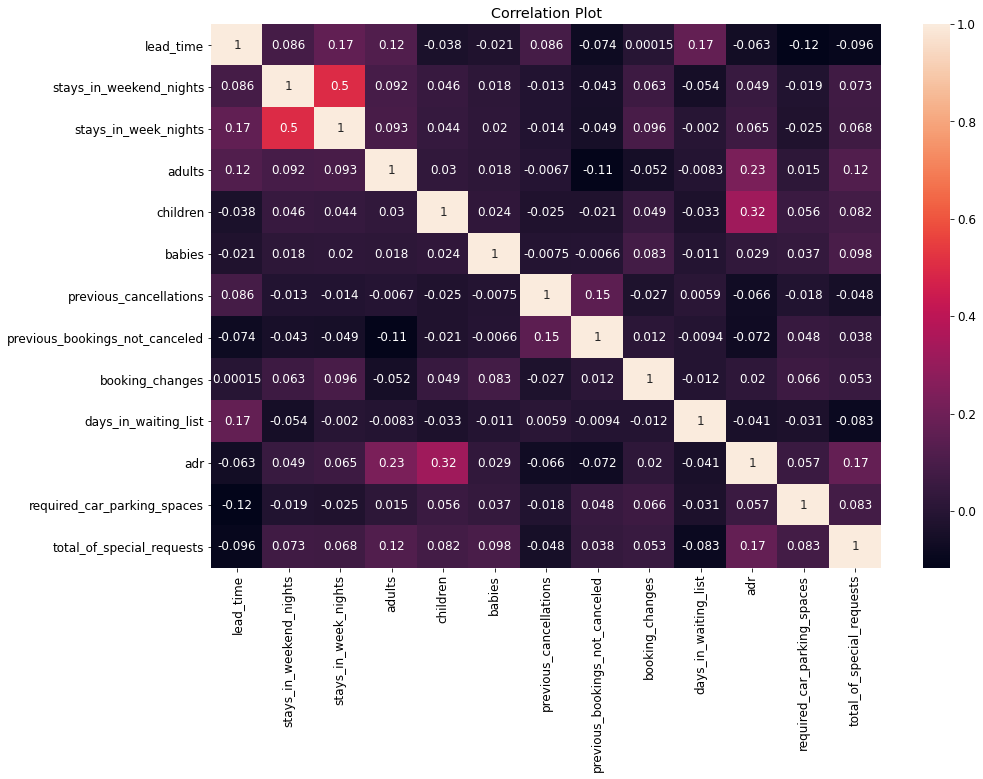

In [28]:
# initial correlation
cor = df[numeric].corr()
plt.figure(figsize=(15,10))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

There there is not seem to be strong correlation between any of the numeric features (the higher one is 0.5 between stays_in_weekend_nights and stays_in_week_nights). Next I take a look closer at the summary statistics for each attribute.

In [29]:
df[numeric].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


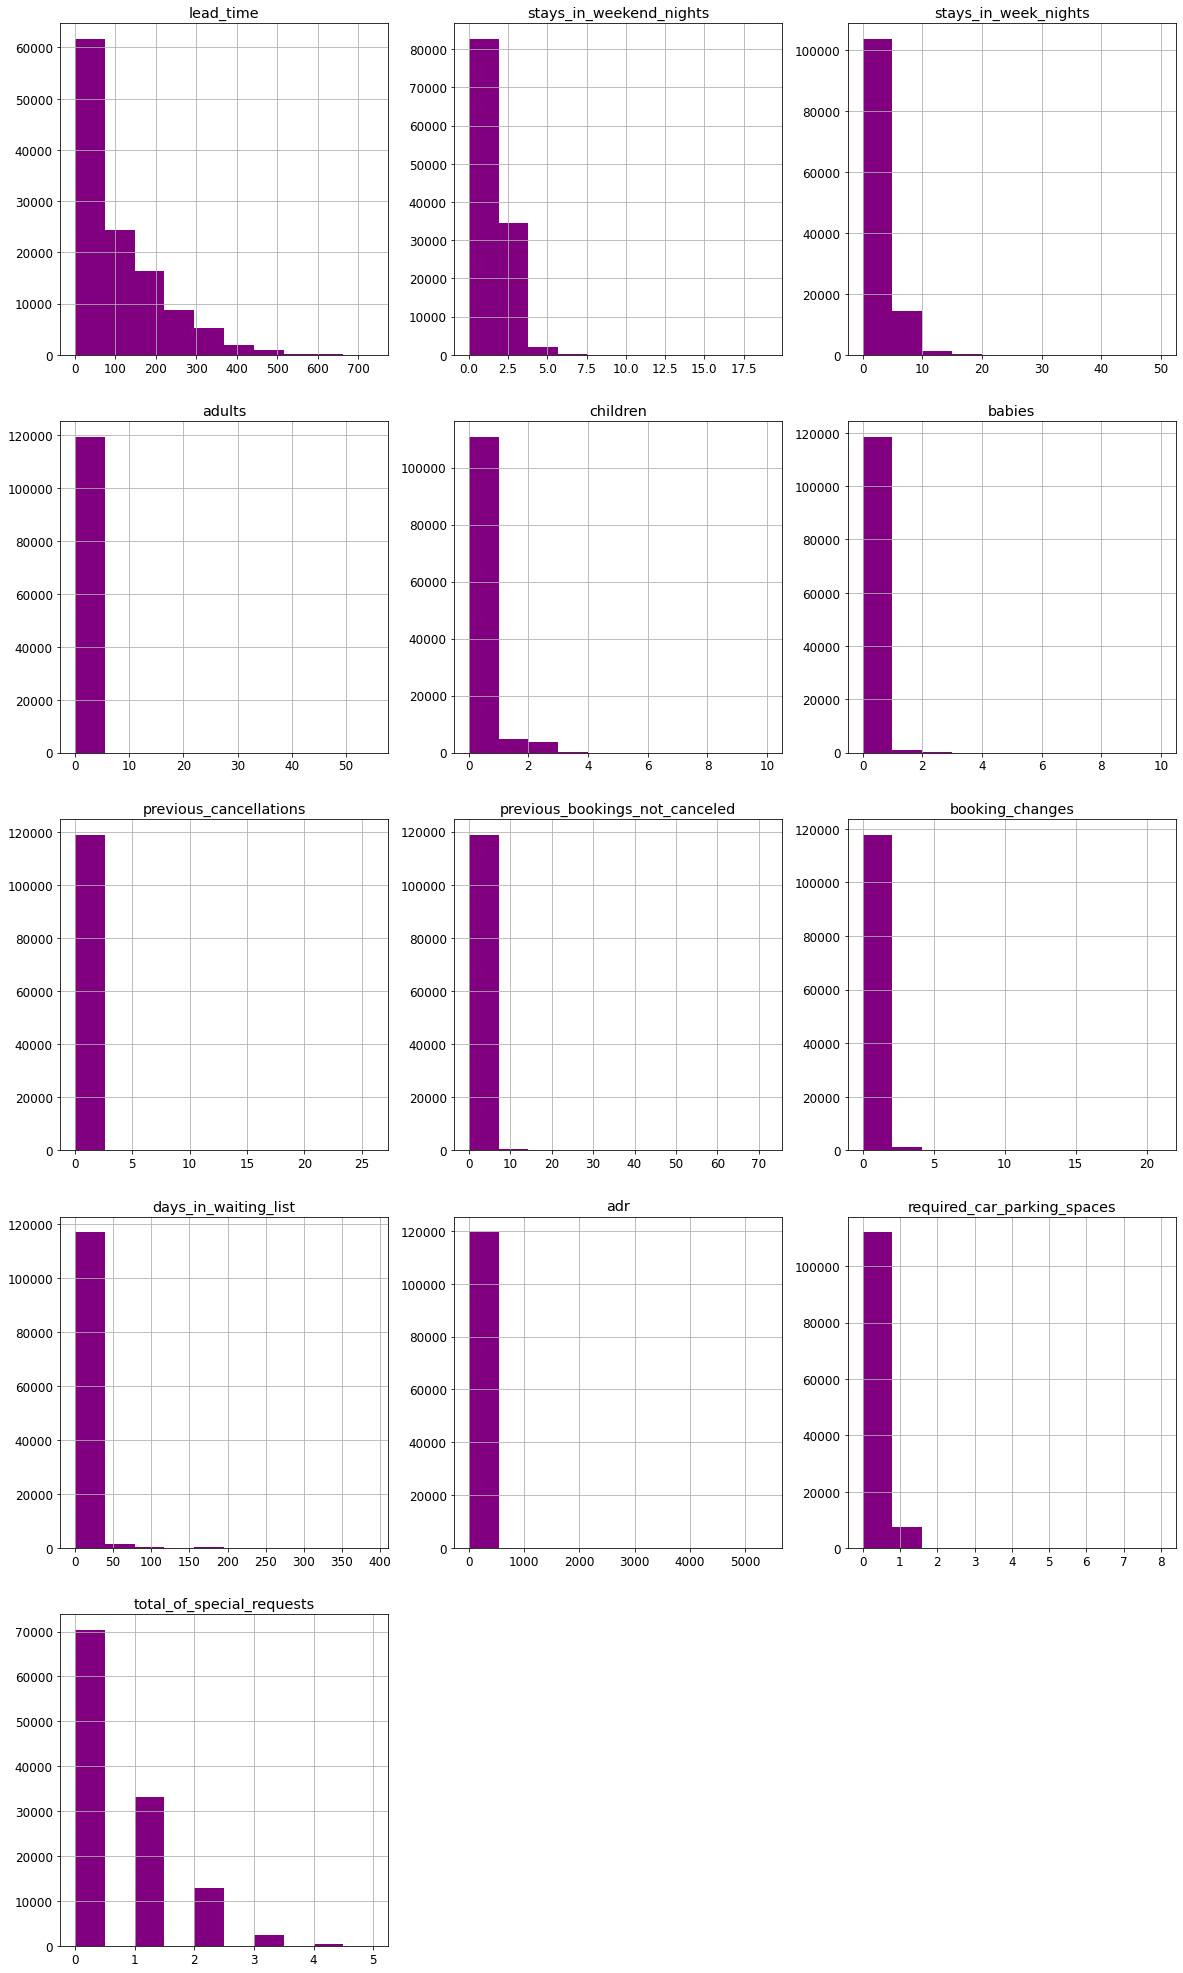

In [30]:
#define a figure to which we will add boxplots of each attribute.
plt.rcParams.update({'font.size': 12,'figure.figsize':(20,50)})

#use an index to identify the spot of the subplot
j=1
columns=df[numeric].columns.tolist()
for k in columns:   #for each numeric column in the dataframe
    plt.subplot(7,3,j) 
    df[k].hist(color='purple');
    plt.title(k)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show();

From the above bar charts we note the following:

- __lead_time:__ it has values that goes up to 700 days, which in the context of hotels it is too high, so will look closer at these outliers. 
- __stays_in_weekend_nights:__ max value is 19, which would mean that someone rented a room for up to 10 weekends (~2 months), which can be considered as valid data, no need to remove outliers. Need to scale the data.
- __stays_in_week_nights:__ max value is 50, which would mean that someone rented a room for up to 10 weeks/2 months, which can be considered as valid data, no need to remove outliers. Need to scale the data.
- __adults:__ 55 adults as a max value is too high, will need to address outliers. Need to scale the data.
- __children:__ 10 children as a max value is too high, will need to address outliers. Need to remove 4 null records and scale the data.
- __babies__: 10 babies as a max value is too high, will need to address outliers. Need to scale the data.
- __previous_cancellations:__ the max value of 26 seems to high, but could be still valid. Need to scale the data.
- __previous_bookings_not_canceled:__ the max value of 72 seems to high, but could be still valid. Need to scale the data.
- __booking_changes:__ the max value of 21 seems to high, but could be still valid. Need to scale the data.
- __days_in_waiting_list:__ 391 days in the waiting list is too high, will need to address outliers. Need to scale the data.
- __adr:__ 5400 as the max value seems too high, will need to address outliers. Need to scale the data.
- __required_car_parking_spaces:__ 8 car spaces seems too high, will need to address outliers.
- __total_of_special_requests:__ there seems to be no issues with this column.

Before addressing each of these columns individually to fix the issues mentioned, lets find columns with low variance (threshold = 0.2) to exclude them for low variability in the data.

In [31]:
# part of the function sourced from https://stackoverflow.com/questions/39812885/retain-feature-names-after-scikit-feature-selection
def variance_threshold_selector(data, threshold=0.2):
    """This function takes a dataframe and optional threshold, which default value is 0.2.
    Applies sklearn VarianceThreshold to get columns with high variance, then returns
    the reminder columns, which are considered with low variance"""
    
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    good_variance_columns = data[data.columns[selector.get_support(indices=True)]].columns
    
    #iterate through the dataframe columns to check which ones don't have good/high variance 
    low_variance_columns = []
    for column in data.columns:
        if column not in good_variance_columns:
            low_variance_columns.append(column)
    return low_variance_columns

low_variance_columns = variance_threshold_selector(df[numeric], 0.2)
low_variance_columns

['children', 'babies', 'required_car_parking_spaces']

I will exclude these 3 columns from the analysis.

In [32]:
# excluding from dataframe
df = df.drop(low_variance_columns, axis=1)

# excluding from list of columns
numeric = [item for item in numeric if item not in low_variance_columns]

Next I will analyze each of the reminder columns individually. For the outliers, if they are considered valid data, I will work identifying the minimum amount that needs to be exclude using IQR and domain knowledge. I will choose not to use techniques such as Winsorizing nor Trimming to avoid changing the probability density function.

### lead_time

We visualize the distribution through a histogram and a boxplot to have a better understanding of potential outliers.

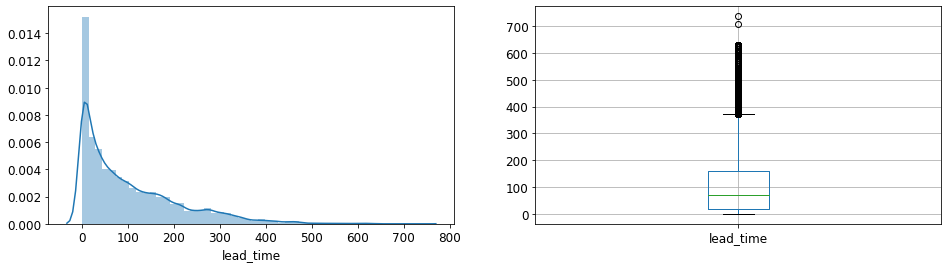

In [33]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["lead_time"]);

plt.subplot(1, 2, 2)
df.boxplot(column='lead_time');

According to some research on the [web](https://www.siteminder.com/r/hotel-distribution/hotel-revenue-management/hotel-guests-book-advance/) there is not seem to be a clear max value, however beyond a year looks like it is a good cutting point. Lets calculate the interquartile range to apply filter to the 75% percentile + 1.5 * IQR.

In [34]:
## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(df.lead_time, [75 ,25])
IQR = quartile75 - quartile25
print("IQR",IQR)

max_value = quartile75 + (IQR*1.5)
print("Max", max_value)

IQR 142.0
Max 373.0


In [35]:
# chequing % of records to be excluded as outliers.
df[df.lead_time>=373].shape[0] / df.shape[0]

0.02541251361085518

By removing the outliers we will get rid of only 2.5% of the data, so it is safe to remove them.

In [36]:
df = df[df.lead_time < max_value]
df.shape

(116356, 49)

Next, similar to the categorical ordinal, we will have a list, with __lead_time__ as the first item, that will contain numeric attributes that need to be scaled to allow to be weighted equally in a ML model.

In [37]:
to_scale = ['lead_time']

### stays_in_weekend_nights

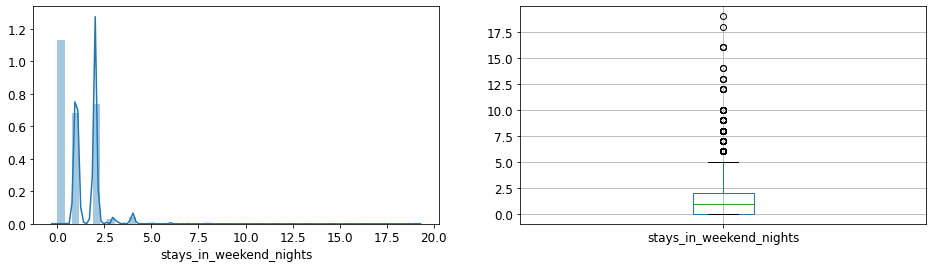

In [38]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["stays_in_weekend_nights"]);

plt.subplot(1, 2, 2)
df.boxplot(column='stays_in_weekend_nights');

In [39]:
## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(df.stays_in_weekend_nights, [75 ,25])
IQR = quartile75 - quartile25
max_value = quartile75 + (IQR*1.5)
print("Max", max_value)

Max 5.0


In [40]:
# chequing % of records to be excluded as outliers.
df[df.stays_in_weekend_nights>=max_value].shape[0] / df.shape[0]

0.0029306610746330226

By removing the outliers we will get rid of only 0.29% of the data, so it is safe to remove them.

In [41]:
df = df[df.stays_in_weekend_nights < max_value]
df.shape

(116015, 49)

Need to scale the data.

In [42]:
to_scale.append('stays_in_weekend_nights')

### stays_in_week_nights

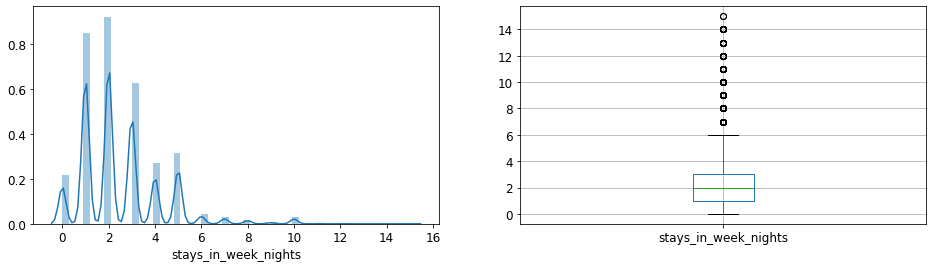

In [43]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["stays_in_week_nights"]);
#df.plot.scatter(x='stays_in_week_nights')

plt.subplot(1, 2, 2)
df.boxplot(column='stays_in_week_nights');

In [44]:
## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(df.stays_in_week_nights, [75 ,25])
IQR = quartile75 - quartile25
max_value = quartile75 + (IQR*1.5)
print("Max", max_value)

Max 6.0


In [45]:
# chequing % of records to be excluded as outliers.
df[df.stays_in_week_nights>max_value].shape[0] / df.shape[0]

0.025677714088695427

By removing the outliers we will be deleting another 2.5%  of the data, and considering data is still valid I want to find a balance between reducing the number of outliers and keeping enough data records, so instead of using 6 as the cutting point I will use 10.

In [46]:
# chequing % of records to be excluded as outliers.
df[df.stays_in_week_nights>=10].shape[0] / df.shape[0]

0.009300521484290825

In [47]:
df = df[df.stays_in_week_nights < 10]
df.shape

(114936, 49)

Need to scale the data.

In [48]:
to_scale.append('stays_in_week_nights')

### adults

For adults, first I will replace the zeros with nan and then use KNN to impute the missing values.

In [49]:
df['adults'] = df['adults'].replace(0, np.nan)
df[df.adults.isna()].shape[0]

386

In [50]:
# imputing missing values
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns.tolist())

# sanity check for missing values after transformation
df[df.adults.isna()].shape[0]

0

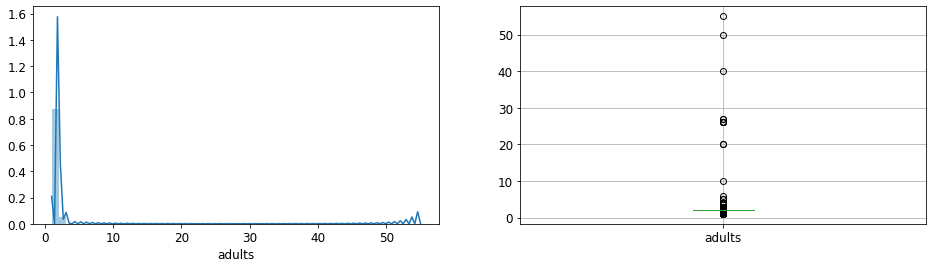

In [51]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["adults"]);
#df.plot.scatter(x='stays_in_week_nights')

plt.subplot(1, 2, 2)
df.boxplot(column='adults');

For the outliers detection I use the same technique as before, with the IQR.

In [52]:
## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(df.adults, [75 ,25])
IQR = quartile75 - quartile25
max_value = quartile75 + (IQR*1.5)
print("Max", max_value)

Max 2.0


Let's consider 3 as a max value.

In [53]:
# chequing % of records to be excluded as outliers.
df[df.adults>3].shape[0] / df.shape[0]

0.0006786385466694508

We only exclude 0.06% of the data

In [54]:
df = df[df.adults <= 3]
df.shape

(114858, 49)

In [55]:
to_scale.append('adults')

### previous_cancellations

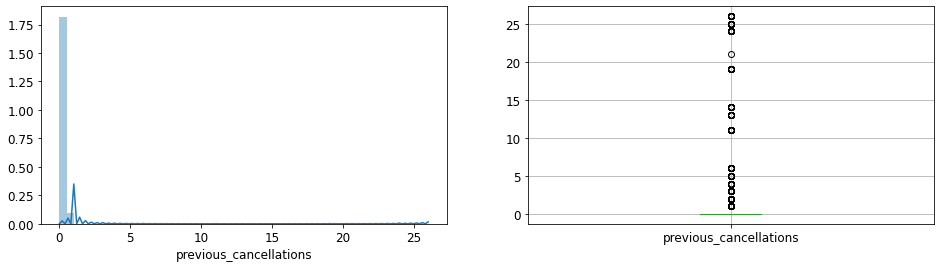

In [56]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["previous_cancellations"]);
#df.plot.scatter(x='stays_in_week_nights')

plt.subplot(1, 2, 2)
df.boxplot(column='previous_cancellations');

Let's consider 10 as the max cutting point.

In [57]:
df[df.previous_cancellations>10].shape[0] / df.shape[0]

0.001567152483936687

In [58]:
# excluding outliers.
df = df[df.previous_cancellations<10]
df.shape

(114678, 49)

In [59]:
# add to the list to scale
to_scale.append('previous_cancellations')

### previous_bookings_not_canceled

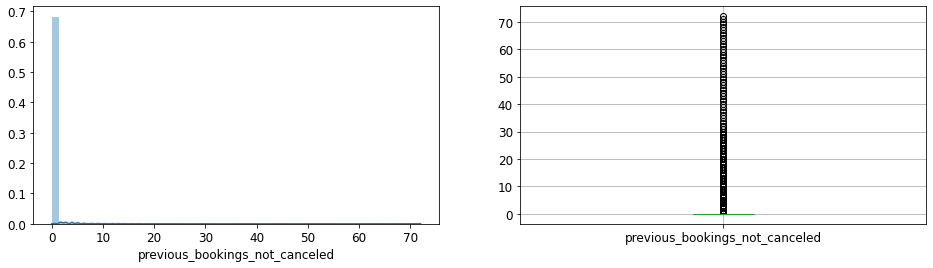

In [60]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["previous_bookings_not_canceled"]);

plt.subplot(1, 2, 2)
df.boxplot(column='previous_bookings_not_canceled');

Let's consider 10 as the max cutting point to see the number of records to exclude.

In [61]:
df[df.previous_bookings_not_canceled>10].shape[0] / df.shape[0]

0.0030781841329636022

In [62]:
# excluding outliers.
df = df[df.previous_bookings_not_canceled<=10]
df.shape

(114325, 49)

In [63]:
# add to the list to scale
to_scale.append('previous_bookings_not_canceled')

### booking_changes

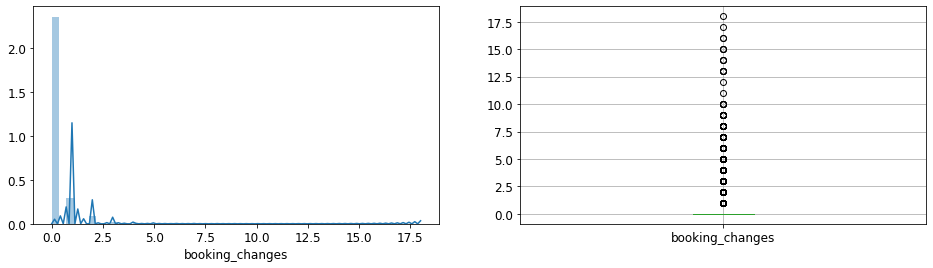

In [64]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["booking_changes"]);

plt.subplot(1, 2, 2)
df.boxplot(column='booking_changes');

Let's consider 2.5 as the max cutting point to see the number of records to exclude.

In [65]:
df[df.booking_changes>2.5].shape[0] / df.shape[0]

0.013041766892630658

In [66]:
# excluding outliers.
df = df[df.booking_changes<=2.5]
df.shape

(112834, 49)

In [67]:
# add to the list to scale
to_scale.append('booking_changes')

### days_in_waiting_list

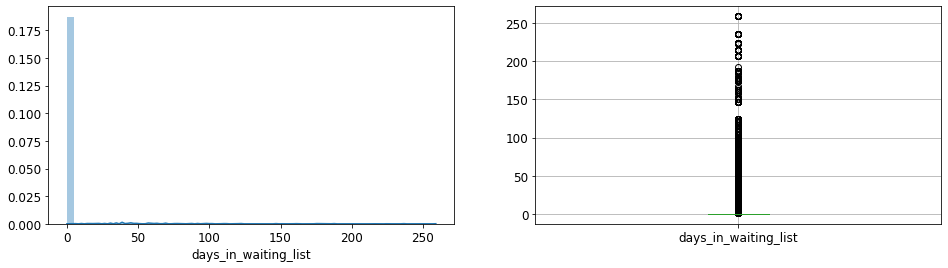

In [68]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["days_in_waiting_list"]);

plt.subplot(1, 2, 2)
df.boxplot(column='days_in_waiting_list');

Let's consider 2.5 as the max cutting point to see the number of records to exclude.

In [69]:
df[df.days_in_waiting_list>2.5].shape[0] / df.shape[0]

0.0305138522076679

In [70]:
df = df[df.days_in_waiting_list<=2.5]

# add to the list to scale
to_scale.append('days_in_waiting_list')

### adr

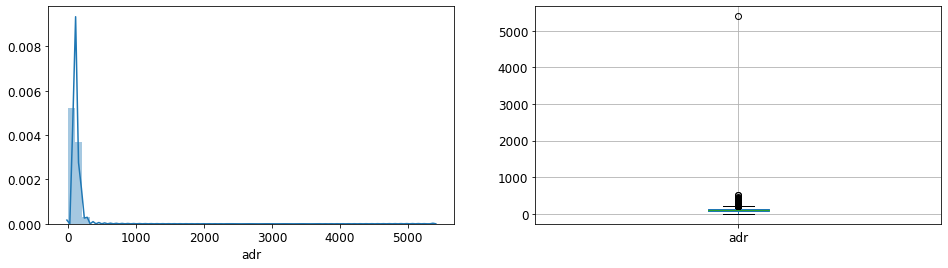

In [71]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["adr"]);

plt.subplot(1, 2, 2)
df.boxplot(column='adr');

In [72]:
## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(df.adr, [75 ,25])
IQR = quartile75 - quartile25
max_value = quartile75 + (IQR*1.5)
print("Max", max_value)

Max 212.45


In [73]:
df[df.adr>max_value].shape[0] / df.shape[0]

0.032132442339863426

To avoid deleting another 3% lets take 250 instead.

In [74]:
df[df.adr>250].shape[0] / df.shape[0]

0.010686436726970226

In [75]:
# exclude outliers
df = df[df.adr<=250]

# add to the list to scale
to_scale.append('adr')

### total_of_special_requests

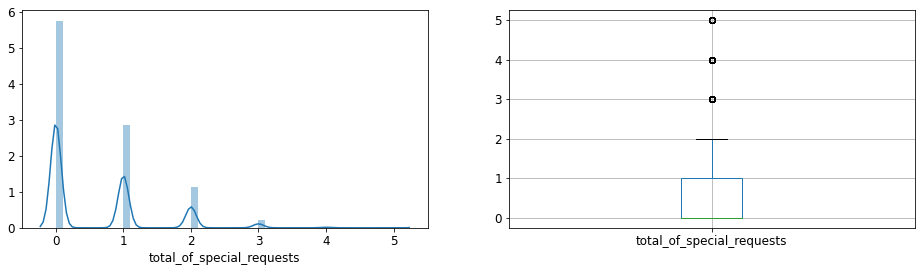

In [76]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.distplot(df["total_of_special_requests"]);

plt.subplot(1, 2, 2)
df.boxplot(column='total_of_special_requests');

In [77]:
## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(df.total_of_special_requests, [75 ,25])
IQR = quartile75 - quartile25
max_value = quartile75 + (IQR*1.5)
print("Max", max_value)

Max 2.5


In [78]:
df[df.total_of_special_requests>max_value].shape[0] / df.shape[0]

0.0242002550313245

In [79]:
df[df.total_of_special_requests>3].shape[0] / df.shape[0]

0.0030123265140174827

In [80]:
# exclude outliers
df = df[df.total_of_special_requests<=3]

In [81]:
# add to the list to scale
to_scale.append('total_of_special_requests')

### Scale numeric data
Since most of the features does not seem to follow a normal distribution I will use min-max normalization through MinMaxScaler.

In [82]:
# create a copy of the dataframe
df_scaled = df.copy()

# apply normalization to selected features
features = df_scaled[to_scale]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
df_scaled[to_scale] = features

# sanity check
df_scaled.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,...,customer_type_other,reservation_status_Check-Out,reservation_status_No-Show,country_ESP,country_FRA,country_GBR,country_ITA,country_PRT,country_missing,country_other
1,0.0,0.018817,0.0,0.545455,0.5,0.0,0.0,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.034946,0.0,0.545455,0.5,0.0,0.0,0.111111,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


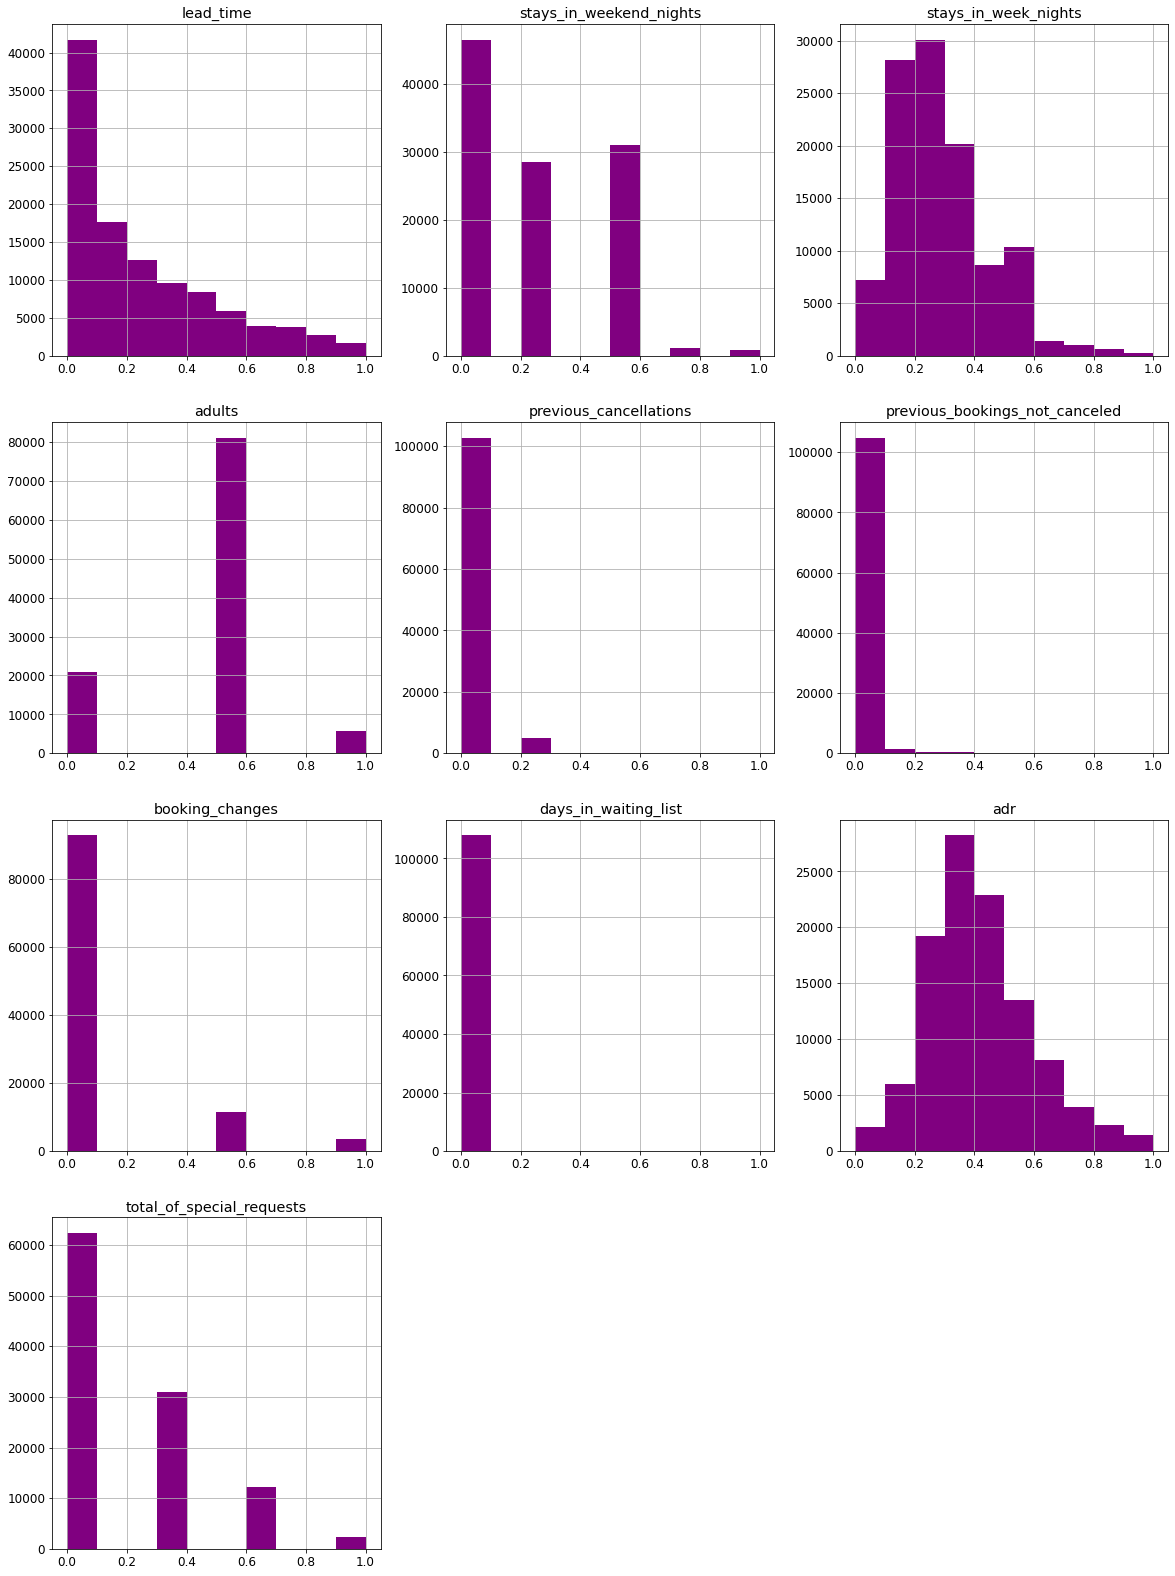

In [83]:
#define a figure to which we will add boxplots of each attribute.
plt.rcParams.update({'font.size': 12,'figure.figsize':(20,50)})

#use an index to identify the spot of the subplot
j=1
columns=df_scaled[numeric].columns.tolist()
for k in columns:   #for each numeric column in the dataframe
    plt.subplot(7,3,j) 
    df_scaled[k].hist(color='purple');
    plt.title(k)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show();

The data has been normalized between 0 and 1 so it has similar weight in a ML model. In addition the majority of outliers have been removed. <br>
Now the dataset in is good position to be used in a ML model creation.